<a href="https://colab.research.google.com/github/beatuphat/for_fun/blob/main/Anscombe_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install.packages("ggpubr")

In [53]:
library(dplyr)
library(ggplot2)
# library(ggpubr)

In [3]:
dat <- datasets::anscombe
dat

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


In [11]:
summary(dat)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

In [4]:
datLong <- data.frame(
    group  = rep(1:4, each = 11),
    x = unlist(dat[,c(1:4)]),
    y = unlist(dat[,c(5:8)])
    )
rownames(datLong) <- NULL

group,x,y
<int>,<dbl>,<dbl>
1,10,8.04
1,8,6.95
1,13,7.58
1,9,8.81
1,11,8.33
1,14,9.96
1,6,7.24
1,4,4.26
1,12,10.84


In [12]:
summary(datLong)

     group            x            y         
 Min.   :1.00   Min.   : 4   Min.   : 3.100  
 1st Qu.:1.75   1st Qu.: 7   1st Qu.: 6.117  
 Median :2.50   Median : 8   Median : 7.520  
 Mean   :2.50   Mean   : 9   Mean   : 7.501  
 3rd Qu.:3.25   3rd Qu.:11   3rd Qu.: 8.748  
 Max.   :4.00   Max.   :19   Max.   :12.740  

In [8]:
datLong %>%
  group_by(group) %>%
  summarise(n = n(), mean_x = mean(x), mean_y = mean(y))


group,n,mean_x,mean_y
<int>,<int>,<dbl>,<dbl>
1,11,9,7.500909
2,11,9,7.500909
3,11,9,7.500000
4,11,9,7.500909


In [32]:
datLong %>%
  group_by(group) %>%
  summarise(across(everything(), list(mean = mean, median = median, min = min, max = max, sd = sd, IQR = IQR, mad = mad)))
  # summarise_all(list(n = n, mean = mean))
  # summarise_all(list(n = n, n_distinct, mean, median, min, max, sd, IQR, mad))

group,x_mean,x_median,x_min,x_max,x_sd,x_IQR,x_mad,y_mean,y_median,y_min,y_max,y_sd,y_IQR,y_mad
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,9,4,14,3.316625,5,4.4478,7.500909,7.58,4.26,10.84,2.031568,2.255,1.823598
2,9,9,4,14,3.316625,5,4.4478,7.500909,8.14,3.10,9.26,2.031657,2.255,1.467774
3,9,9,4,14,3.316625,5,4.4478,7.500000,7.11,5.39,12.74,2.030424,1.730,1.527078
4,9,8,8,19,3.316625,0,0.0000,7.500909,7.04,5.25,12.50,2.030579,2.020,1.897728


In [30]:
datLong %>%
  group_by(group) %>%
  summarise(count = n(), distinct_x = n_distinct(x), distinct_y = n_distinct(y), mean_x = mean(x), mean_y = mean(y))


group,count,distinct_x,distinct_y,mean_x,mean_y
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,11,11,11,9,7.500909
2,11,11,11,9,7.500909
3,11,11,11,9,7.500000
4,11,2,11,9,7.500909


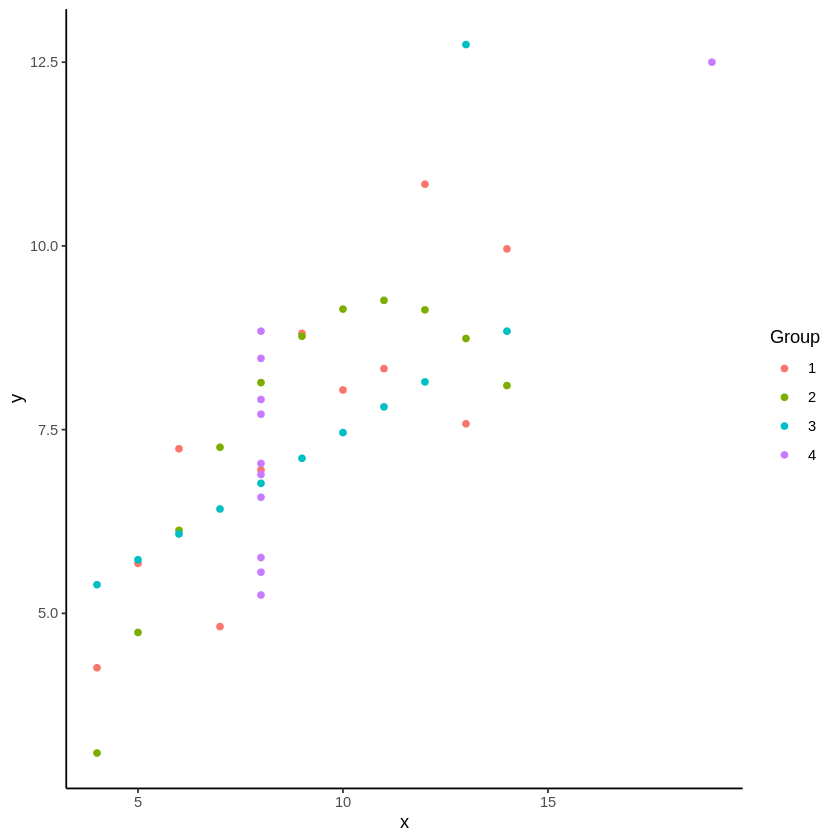

In [37]:
ggplot(datLong) + geom_point(aes(x = x, y = y, color = as.factor(group))) + theme_classic() + scale_color_discrete(name = "Group")

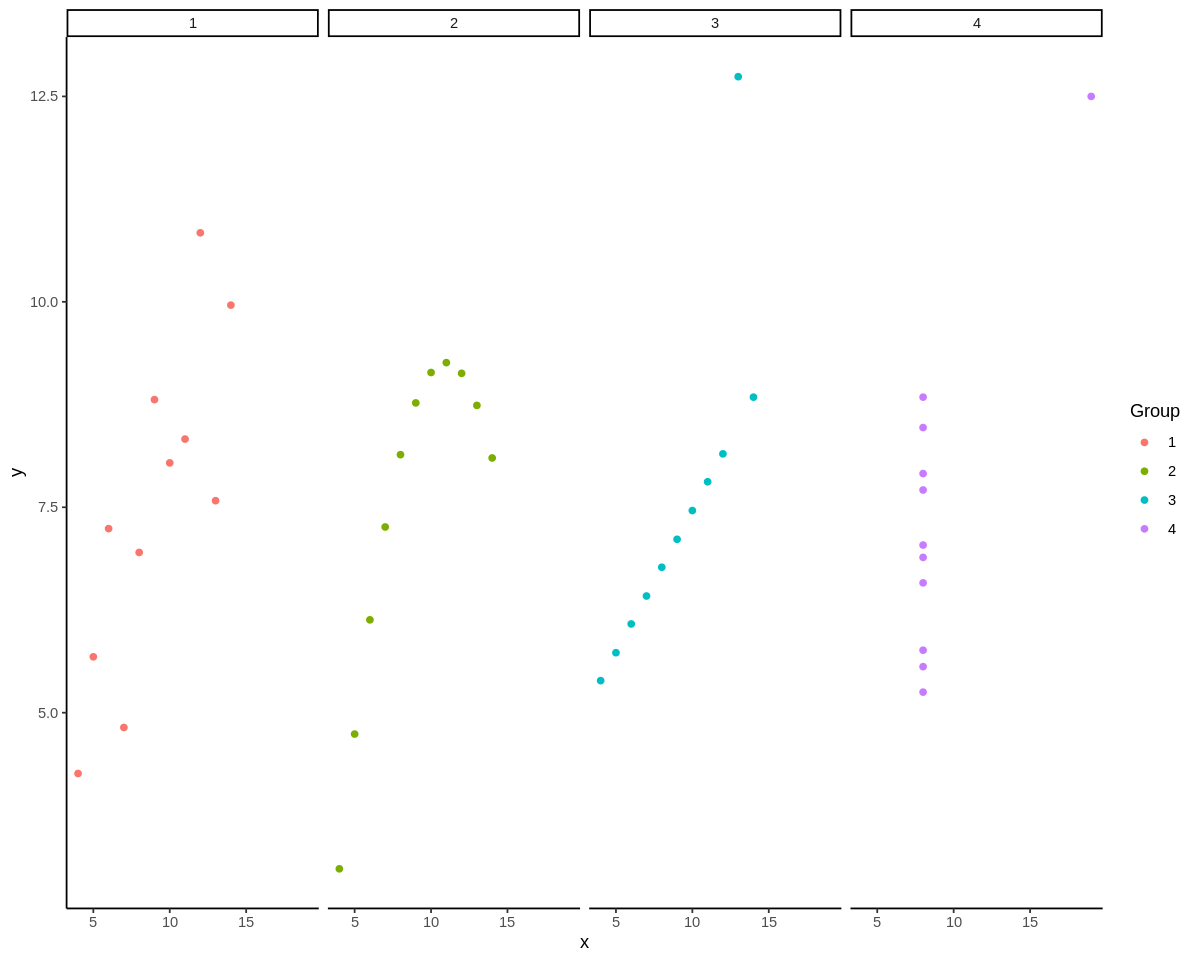

In [44]:
# Increase plot size
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(datLong) + geom_point(aes(x = x, y = y, color = as.factor(group))) + facet_wrap("group", nrow = 1) + theme_classic() + scale_color_discrete(name = "Group")

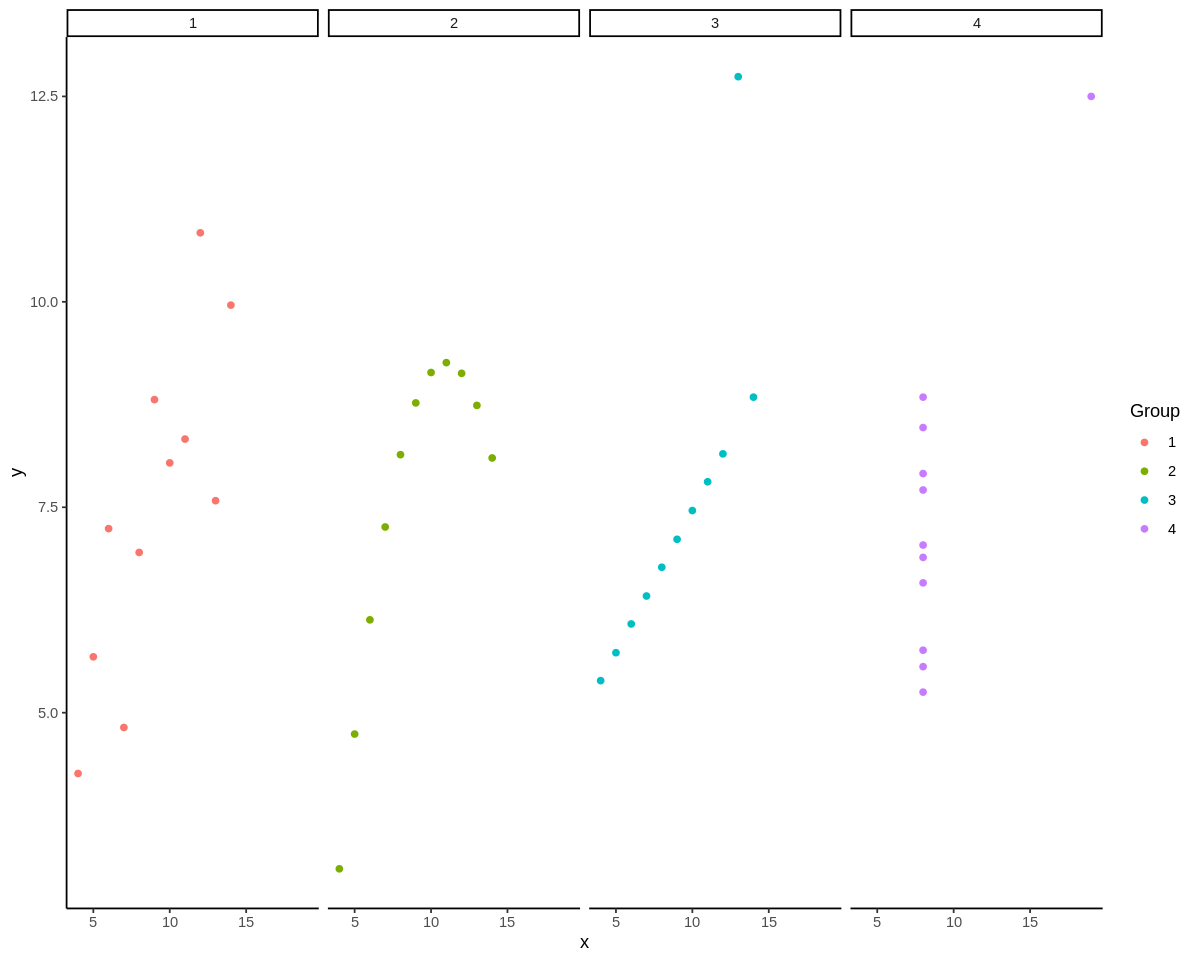

In [56]:
# Increase plot size
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(datLong) + geom_point(aes(x = x, y = y, color = as.factor(group))) +
  facet_wrap("group", nrow = 1) +
  theme_classic() +
  scale_color_discrete(name = "Group")
  # geom_smooth(method = "lm", se = FALSE)
  # stat_regline_equation(label.x = 1.5, label.y = 8)